In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.decomposition import PCA

In [24]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-02\harmonics_phase_1_2017-03-02.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    phase1harmonics = pd.DataFrame(dset['harmonics_i'])

In [11]:
phase1_2kHz = phase1harmonics.iloc[:,0:40]

In [13]:
phase1_2kHz

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.036987,0.759766,0.040009,0.721191,0.024002,0.085022,0.012001,0.259033,0.016006,0.391113,...,0.013000,0.054993,0.014000,0.135010,0.016998,0.048004,0.010002,0.016998,0.009003,0.104980
1,0.024994,0.766113,0.020004,0.711914,0.020996,0.096985,0.028000,0.256104,0.022995,0.397949,...,0.010002,0.054993,0.014000,0.150024,0.013000,0.044006,0.011002,0.018005,0.011002,0.104980
2,0.020004,0.764160,0.037994,0.712891,0.032990,0.091980,0.031006,0.261963,0.029999,0.399902,...,0.010002,0.065979,0.016998,0.159058,0.020996,0.035004,0.016998,0.016006,0.016998,0.101990
3,0.040009,0.757812,0.014999,0.711914,0.024994,0.088989,0.020004,0.244019,0.020004,0.392090,...,0.014999,0.068970,0.011002,0.150024,0.016006,0.036987,0.009003,0.029999,0.013000,0.106018
4,0.028000,0.765137,0.041992,0.717773,0.032013,0.078979,0.020996,0.240967,0.018005,0.383057,...,0.018005,0.058014,0.011002,0.157959,0.016006,0.039001,0.018005,0.018997,0.012001,0.101013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168057,0.013000,0.646973,0.010002,0.509766,0.010002,0.264893,0.004002,0.217041,0.003000,0.161011,...,0.004002,0.096008,0.004002,0.058014,0.007000,0.022995,0.003000,0.044006,0.004002,0.050995
168058,0.011002,0.649902,0.009003,0.512207,0.008003,0.268066,0.005001,0.222046,0.004002,0.165039,...,0.003000,0.094971,0.003000,0.057007,0.004002,0.024002,0.002001,0.045013,0.004002,0.049988
168059,0.020004,0.652832,0.016006,0.509766,0.014999,0.271973,0.007000,0.225952,0.006001,0.167969,...,0.005001,0.090027,0.003000,0.058990,0.006001,0.026993,0.003000,0.044006,0.004002,0.048004
168060,0.013000,0.653809,0.009003,0.514160,0.012001,0.270996,0.005001,0.229980,0.005001,0.171021,...,0.003000,0.093994,0.003000,0.061005,0.005001,0.028000,0.003000,0.044006,0.004002,0.046997


In [15]:
model = PCA(2)

In [17]:
phase1_2kHz_trans = model.fit_transform(phase1_2kHz)

In [19]:
phase1_2kHz_trans

array([[ 0.07914686, -0.13766521],
       [ 0.07551186, -0.1301481 ],
       [ 0.08029508, -0.13540427],
       ...,
       [-0.47029518,  0.0757401 ],
       [-0.46987877,  0.07701889],
       [-0.47625398,  0.07253744]])

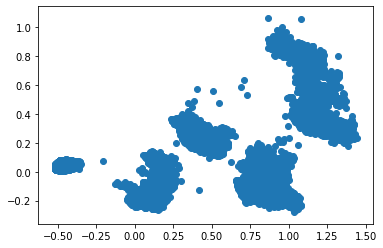

In [21]:
plt.scatter(phase1_2kHz_trans[:,0], phase1_2kHz_trans[:,1])
plt.show()

In [23]:
model2 = PCA(2)

In [25]:
phase1_rest = phase1harmonics.iloc[:,40:]

In [27]:
phase1_rest_trans = model2.fit_transform(phase1_rest)

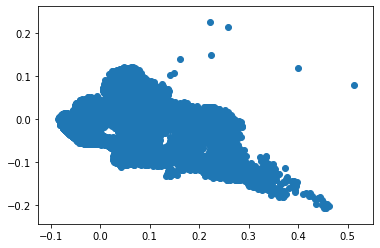

In [29]:
plt.scatter(phase1_rest_trans[:,0], phase1_rest_trans[:,1])
plt.show()

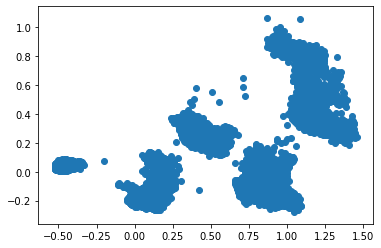

In [25]:
model3 = PCA(2)
phase1_trans = model3.fit_transform(phase1harmonics)
plt.scatter(phase1_trans[:,0], phase1_trans[:,1])
plt.show()

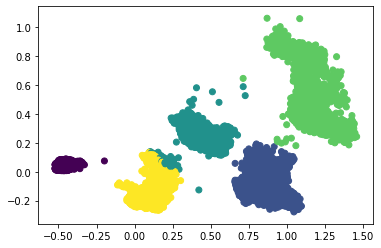

In [26]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(phase1_trans)
plt.scatter(phase1_trans[:,0], phase1_trans[:,1], c=kmeans.labels_)
plt.show()

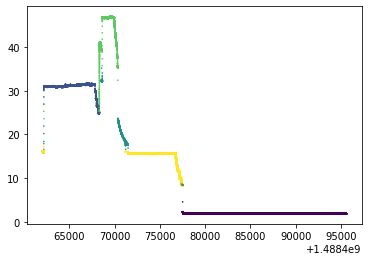

In [29]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-02\phase_1_2017-03-02.h5", "r") as f:
    dset = f["tenperiodtable"]
    timeaxis = dset["timestamp"]
    dataPhase0 = dset["rms_i"]
plt.scatter(timeaxis, dataPhase0, c=kmeans.labels_)
plt.show()

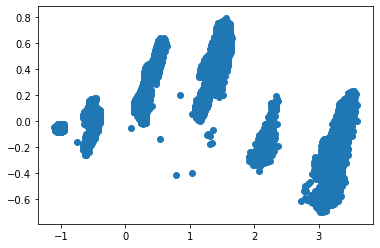

In [34]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-02\harmonics_phase_2_2017-03-02.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    phase2harmonics = pd.DataFrame(dset['harmonics_i'])
phase2_2kHz = phase2harmonics.iloc[:,0:40]
model4 = PCA(2)
phase2_trans = model4.fit_transform(phase2harmonics)
plt.scatter(phase2_trans[:,0], phase2_trans[:,1])
plt.show()

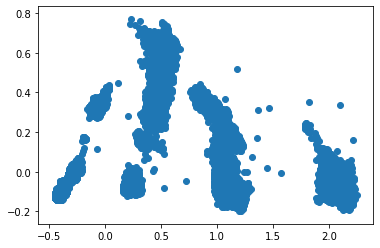

In [37]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-02\harmonics_phase_3_2017-03-02.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    phase3harmonics = pd.DataFrame(dset['harmonics_i'])
phase3_2kHz = phase3harmonics.iloc[:,0:40]
model5 = PCA(2)
phase3_trans = model5.fit_transform(phase3harmonics)
plt.scatter(phase3_trans[:,0], phase3_trans[:,1])
plt.show()

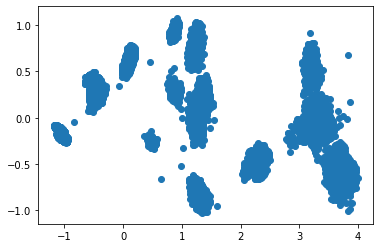

In [40]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-02\harmonics_phase_0_2017-03-02.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    phase0harmonics = pd.DataFrame(dset['harmonics_i'])
model6 = PCA(2)
phase0_trans = model6.fit_transform(phase0harmonics)
plt.scatter(phase0_trans[:,0], phase0_trans[:,1])
plt.show()

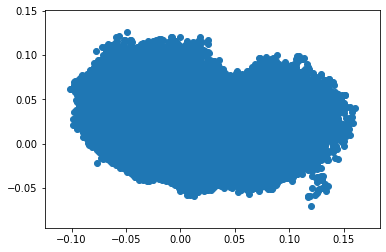

In [44]:
with h5py.File("C:\MessdatenStoeckach\\2018-02-17\harmonics_phase_0_2018-02-17.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    phase0harmonics = pd.DataFrame(dset['harmonics_i'])
model7 = PCA(2)
phase0_trans = model7.fit_transform(phase0harmonics)
plt.scatter(phase0_trans[:,0], phase0_trans[:,1])
plt.show()

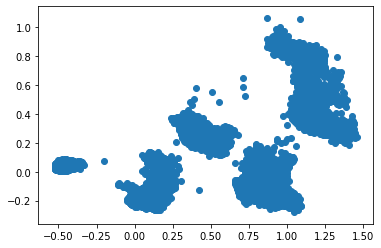

In [46]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-02\harmonics_phase_1_2017-03-02.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    phase1harmonics = pd.DataFrame(dset['harmonics_i'])
model8 = PCA(2)
phase1_trans = model8.fit_transform(phase1harmonics)
plt.scatter(phase1_trans[:,0], phase1_trans[:,1])
plt.show()

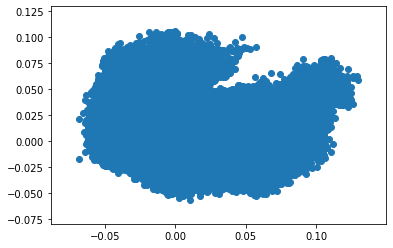

In [49]:
with h5py.File("C:\MessdatenStoeckach\\2018-02-17\harmonics_phase_1_2018-02-17.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    phase1harmonics = pd.DataFrame(dset['harmonics_i'])
model = PCA(2)
phase1_trans = model.fit_transform(phase1harmonics)
plt.scatter(phase1_trans[:,0], phase1_trans[:,1])
plt.show()

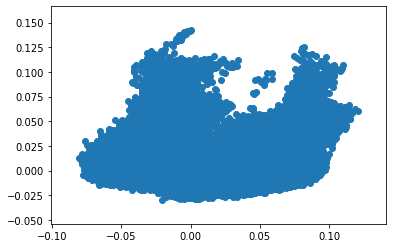

In [50]:
with h5py.File("C:\MessdatenStoeckach\\2018-02-17\harmonics_phase_2_2018-02-17.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    harmonics = pd.DataFrame(dset['harmonics_i'])
model = PCA(2)
phase_trans = model.fit_transform(harmonics)
plt.scatter(phase_trans[:,0], phase_trans[:,1])
plt.show()

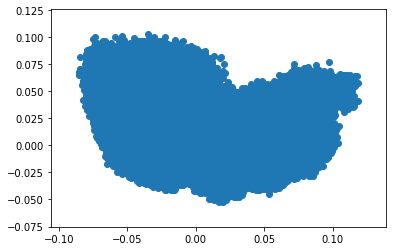

In [52]:
with h5py.File("C:\MessdatenStoeckach\\2018-02-17\harmonics_phase_3_2018-02-17.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    harmonics = pd.DataFrame(dset['harmonics_i'])
model = PCA(2)
phase_trans = model.fit_transform(harmonics)
plt.scatter(phase_trans[:,0], phase_trans[:,1])
plt.show()

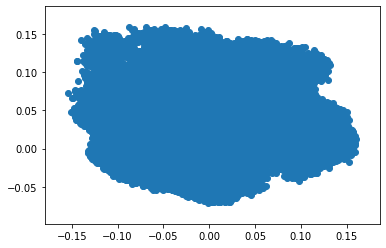

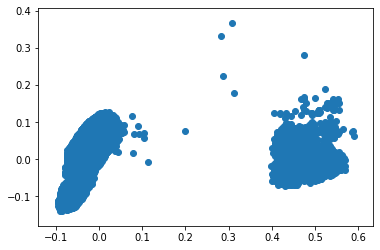

KeyboardInterrupt: 

In [53]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-04\harmonics_phase_1_2017-03-04.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    harmonics = pd.DataFrame(dset['harmonics_i'])
model = PCA(2)
phase_trans = model.fit_transform(harmonics)
plt.scatter(phase_trans[:,0], phase_trans[:,1])
plt.show()

with h5py.File("C:\MessdatenStoeckach\\2017-03-04\harmonics_phase_2_2017-03-04.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    harmonics = pd.DataFrame(dset['harmonics_i'])
model = PCA(2)
phase_trans = model.fit_transform(harmonics)
plt.scatter(phase_trans[:,0], phase_trans[:,1])
plt.show()

with h5py.File("C:\MessdatenStoeckach\\2017-03-04\harmonics_phase_3_2017-03-04.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    harmonics = pd.DataFrame(dset['harmonics_i'])
model = PCA(2)
phase_trans = model.fit_transform(harmonics)
plt.scatter(phase_trans[:,0], phase_trans[:,1])
plt.show()

with h5py.File("C:\MessdatenStoeckach\\2017-03-04\harmonics_phase_0_2017-03-04.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    harmonics = pd.DataFrame(dset['harmonics_i'])
model = PCA(2)
phase_trans = model.fit_transform(harmonics)
plt.scatter(phase_trans[:,0], phase_trans[:,1])
plt.show()

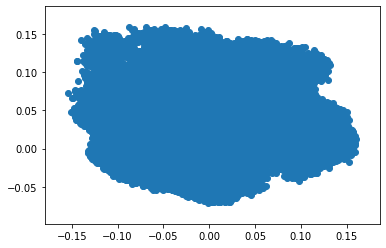

In [2]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-04\harmonics_phase_1_2017-03-04.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    harmonics = pd.DataFrame(dset['harmonics_i'])
model = PCA(2)
phase_trans = model.fit_transform(harmonics)
plt.scatter(phase_trans[:,0], phase_trans[:,1])
plt.show()

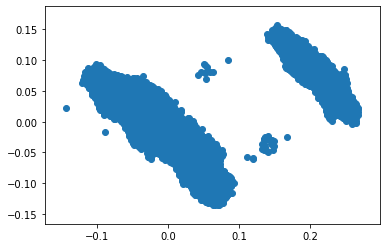

In [3]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-04\harmonics_phase_3_2017-03-04.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    harmonics = pd.DataFrame(dset['harmonics_i'])
model = PCA(2)
phase_trans = model.fit_transform(harmonics)
plt.scatter(phase_trans[:,0], phase_trans[:,1])
plt.show()

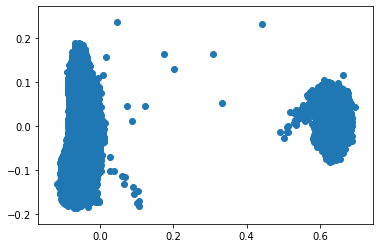

In [4]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-04\harmonics_phase_0_2017-03-04.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    harmonics = pd.DataFrame(dset['harmonics_i'])
model = PCA(2)
phase_trans = model.fit_transform(harmonics)
plt.scatter(phase_trans[:,0], phase_trans[:,1])
plt.show()

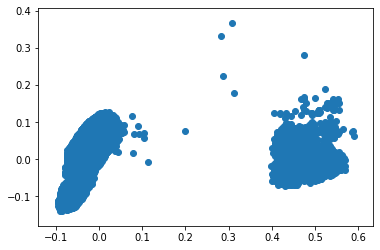

In [5]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-04\harmonics_phase_2_2017-03-04.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    harmonics = pd.DataFrame(dset['harmonics_i'])
model = PCA(2)
phase_trans = model.fit_transform(harmonics)
plt.scatter(phase_trans[:,0], phase_trans[:,1])
plt.show()

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
phase_trans.shape

(432071, 2)

In [12]:
clustering = DBSCAN(eps=0.01, min_samples=8).fit(phase_trans)

MemoryError: 

In [13]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(phase_trans)
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

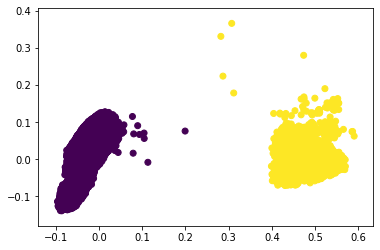

In [16]:
plt.scatter(phase_trans[:,0], phase_trans[:,1], c=kmeans.labels_)
plt.show()

In [18]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-04\phase_2_2017-03-04.h5", "r") as f:
    dset = f["tenperiodtable"]
    dataPhase2 = dset["rms_i"]
    timeaxis = dset["timestamp"]

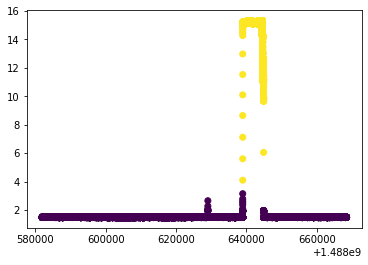

In [23]:
plt.scatter(timeaxis, dataPhase2, c=kmeans.labels_)
plt.show()

In [21]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
a = 3
print(a)

3
